# Importing libraries

In [1]:
import pandas as pd
import gzip
import json

# Reading Data

In [2]:
def read_data(file_path):
    def parse(path):
        g = gzip.open(file_path, 'r')
        for l in g:
            yield json.loads(l)

    def getDF(path):
        i = 0
        df = {}
        for d in parse(path):
            df[i] = d
            i += 1
        return pd.DataFrame.from_dict(df, orient='index')
    df = getDF(file_path)
    return df

In [3]:
amazon_fashion=read_data('SIHN/AMAZON_FASHION_5.json.gz')
amazon_all_beauty=read_data('SIHN/All_Beauty_5.json.gz')
amazon_applicanes=read_data('SIHN/Appliances_5.json.gz')
amazon_magazine=read_data('SIHN/Magazine_Subscriptions_5.json.gz')
amazon_software=read_data('SIHN/Software_5.json.gz')
amazon_giftcards=read_data('SIHN/Gift_Cards_5.json.gz')

In [4]:
amazon_fashion.to_csv('SIHN/amazon_fashion.csv',index=False)
amazon_all_beauty.to_csv("SIHN/amazon_all_beauty.csv",index=False)
amazon_applicanes.to_csv("SIHN/amazon_applicanes.csv",index=False)
amazon_magazine.to_csv("SIHN/amazon_magazine.csv",index=False)
amazon_software.to_csv("SIHN/amazon_software.csv",index=False)
amazon_giftcards.to_csv("SIHN/amazon_giftcards.csv",index=False)

In [5]:
print("Length of data with duplicates:",
      len(amazon_fashion),len(amazon_all_beauty),len(amazon_applicanes),
      len(amazon_magazine),len(amazon_software),len(amazon_giftcards))
print("Total number of data with duplication: {}".format(
     len(amazon_fashion)+len(amazon_all_beauty)+len(amazon_applicanes)
     +len(amazon_magazine)+len(amazon_software)+len(amazon_giftcards)))

Length of data with duplicates: 3176 5269 2277 2375 12805 2972
Total number of data with duplication: 28874


In [6]:
amazon_fashion = amazon_fashion.drop_duplicates('reviewText', keep='last')
amazon_all_beauty = amazon_all_beauty.drop_duplicates('reviewText', keep='last')
amazon_applicanes = amazon_applicanes.drop_duplicates('reviewText', keep='last')
amazon_magazine = amazon_magazine.drop_duplicates('reviewText', keep='last')
amazon_software = amazon_software.drop_duplicates('reviewText', keep='last')
amazon_giftcards = amazon_giftcards.drop_duplicates('reviewText', keep='last')

In [7]:
print("Length of amazon_fashion data after removing duplicates:",
      len(amazon_fashion),len(amazon_all_beauty),len(amazon_applicanes),
      len(amazon_magazine),len(amazon_software),len(amazon_giftcards))
print("Total number of data after duplication: {}".format(
     len(amazon_fashion)+len(amazon_all_beauty)+len(amazon_applicanes)
     +len(amazon_magazine)+len(amazon_software)+len(amazon_giftcards)))

Length of amazon_fashion data after removing duplicates: 439 1364 144 1890 10606 1938
Total number of data after duplication: 16381


In [8]:
amazon_review_data_frame=[amazon_fashion,amazon_all_beauty,amazon_applicanes,amazon_magazine,amazon_software,amazon_giftcards]

In [9]:
amazon_review_dfr=pd.DataFrame([])
amazon_review_dfr=pd.concat(amazon_review_data_frame,sort=False)

In [10]:
amazon_review_dfr.iloc[1000:1005]

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
4318,5.0,True,"01 7, 2017",A2B33XXX3MZC6R,B001OHV1H4,{'Size:': ' 49'},Tom Waters,Great comb! Very well made and the wood even h...,Another quality product from Northern Fir,1483747200,NaN,NaN
4320,5.0,True,"01 5, 2017",A1C13KVGOWMI6A,B001OHV1H4,{'Size:': ' 78'},Heather,Great product and good service.,Five Stars,1483574400,NaN,NaN
4321,5.0,False,"12 29, 2016",A2KPY1O5YG9B6I,B001OHV1H4,{'Size:': ' 28'},lhasa lover,I'm 63 with still nice hair but so much less t...,great conditioner but please make a larger bottle,1482969600,3,NaN
4322,5.0,True,"12 26, 2016",A7QMV1ENEUAC9,B001OHV1H4,{'Size:': ' 1000ml/33.8oz'},mary,"love this shampoo, came very quickly, thank you.",Five Stars,1482710400,NaN,NaN
4323,5.0,True,"12 20, 2016",A22WRCL3T66COU,B001OHV1H4,{'Size:': ' 352'},Moniqueici,Eau de Hadrien is my favorite of the Annick Go...,Lovely light fragrance,1482192000,NaN,NaN


In [11]:
amazon_review_dfr.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'style',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'image'],
      dtype='object')

In [12]:
amazon_review_dfr.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
4,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue/Pink'}",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
5,3.0,True,"05 6, 2015",A3W11493KS6Z2L,B000K2PJ4K,"{'Size:': ' Little Boys', 'Color:': ' White/Bl...",NaeNae,Waaay too small. Will use for futur children!,Oops!,1430870400,NaN,NaN
7,5.0,True,"05 6, 2015",A3W11493KS6Z2L,B000K2PJ4K,"{'Size:': ' Little Boys', 'Color:': ' Blue (37...",NaeNae,Stays vibrant after many washes,Good,1430870400,NaN,NaN
8,5.0,True,"05 6, 2015",A3W11493KS6Z2L,B000K2PJ4K,"{'Size:': ' Little Boys', 'Color:': ' Blue/Pink'}",NaeNae,My son really likes the pink. Ones which I was...,Great,1430870400,NaN,NaN
9,3.0,True,"05 6, 2015",A3W11493KS6Z2L,B000K2PJ4K,"{'Size:': ' Little Boys', 'Color:': ' Light Bl...",NaeNae,Waaay too small. Will use for future child.,Oops!,1430870400,NaN,NaN


In [13]:
amazon_review_data=pd.DataFrame(columns=['Reviews','Ratings'])
amazon_review_data['Reviews']=amazon_review_dfr['reviewText']
amazon_review_data['Ratings']=amazon_review_dfr['overall']

In [14]:
print("Review:",amazon_review_data['Reviews'].iloc[206])
print("Review:",amazon_review_data['Ratings'].iloc[206])

Review: I love these shoes so much that  I reordered another pair online. It's hard to find shoes that fit my really wide feet! The heel back is my favorite part on them, they're thin and feel like another layer of skin, not bulky or tight at all.  I walked all over Europe in these!
Review: 5.0


In [15]:
print("Data size:",len(amazon_review_data))

Data size: 16381


# Topic Modelling

In [16]:
import nltk; nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])


In [23]:
amazon_review_data=amazon_review_data.reset_index(drop=True)

In [24]:
amazon_review_data.head()

,Reviews,Ratings
0,Great product and price!,5.0
1,Waaay too small. Will use for futur children!,3.0
2,Stays vibrant after many washes,5.0
3,My son really likes the pink. Ones which I was...,5.0
4,Waaay too small. Will use for future child.,3.0


In [19]:
import re
from pprint import pprint
# Convert to list
data = amazon_review_data.Reviews.values.tolist()

In [21]:
data[0:2]

['Great product and price!', 'Waaay too small. Will use for futur children!']

In [30]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess

In [31]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations


In [35]:
data[1]

'Waaay too small. Will use for futur children!'

In [38]:
data_words[1]

['waaay', 'too', 'small', 'will', 'use', 'for', 'futur', 'children']

In [33]:
data_words = list(sent_to_words(data))

In [43]:
print(data[500])
print(data_words[500])

This might have been a nice product if they had been a usable size.  Even accounting for wiggling wet hands into fabric, these are oversized.  They should be clearly labeled as EXTRA LARGE and their should be a smaller version as an option.  Offering at least two sizes (S/M and L/XL) seems a fair expectation.  Without size options, I expect the size to be "medium" not extra large.  This is neither one-size-fits-all or one-size-fits-most.

If your hands are small, these are unusable.  If your hands are average, you will still find this big.

Fabric is soft and washable.
['this', 'might', 'have', 'been', 'nice', 'product', 'if', 'they', 'had', 'been', 'usable', 'size', 'even', 'accounting', 'for', 'wiggling', 'wet', 'hands', 'into', 'fabric', 'these', 'are', 'oversized', 'they', 'should', 'be', 'clearly', 'labeled', 'as', 'extra', 'large', 'and', 'their', 'should', 'be', 'smaller', 'version', 'as', 'an', 'option', 'offering', 'at', 'least', 'two', 'sizes', 'and', 'xl', 'seems', 'fair', '

In [39]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [47]:
# See trigram example
print(trigram_mod[bigram_mod[data_words[6545]]])

['love', 'this', 'internet_security', 'product', 'have', 'it', 'on', 'all', 'my', 'computers', 'my', 'son', 'was', 'having', 'problem', 'with', 'his', 'kapersky', 'security', 'so', 'bought', 'trend_micro', 'pro', 'for', 'him', 'great', 'price', 'and', 'quick', 'shipment', 'super', 'product', 'and', 'telephone', 'support', 'can', 'beat', 'that', 'deal']


In [52]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out


In [53]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

In [54]:
print("Tokenized data with stop words: \n",data_words[155])
print("Tokenized data without stop words: \n",data_words_nostops[155])

Tokenized data with stop words: 
 ['bought', 'these', 'as', 'my', 'back', 'up', 'shoes', 'but', 'they', 'have', 'turned', 'into', 'my', 'daily', 'ones', 'go', 'to', 'so', 'comfortable', 'and', 'my', 'feet', 'don', 'hurt', 'after', 'long', 'hours', 'on', 'my', 'feet', 'own', 'cleaning', 'business', 'so', 'need', 'my', 'feet', 'not', 'to', 'hurt', 'in', 'the', 'middle', 'of', 'the', 'day']
Tokenized data without stop words: 
 ['bought', 'back', 'shoes', 'turned', 'daily', 'ones', 'go', 'comfortable', 'feet', 'hurt', 'long', 'hours', 'feet', 'cleaning', 'business', 'need', 'feet', 'hurt', 'middle', 'day']


In [55]:
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

In [56]:
print("Bigrams:\n",data_words_bigrams[545])

Bigrams:
 ['works', 'good', 'exercise']


In [57]:
#!python3 -m spacy download en
import spacy
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load('en', disable=['parser', 'ner'])

In [58]:
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [59]:
print("Tokenized data before lemmatization:\n",data_words_bigrams[654])
print("Tokenized data after lemmatization:\n",data_lemmatized[654])

Tokenized data before lemmatization:
 ['good', 'product', 'shipped', 'quick', 'packaged', 'well', 'buy']
Tokenized data after lemmatization:
 ['good', 'product', 'ship', 'quick', 'package', 'well', 'buy']


In [60]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

In [61]:
# Create Corpus
texts = data_lemmatized

In [62]:
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [63]:
# View
print(corpus[1065])

[(0, 1), (1, 1), (2, 1), (127, 1), (132, 1), (215, 1), (1389, 1)]


In [68]:
data_lemmatized[0]

['great', 'product', 'price']

In [64]:
corpus[0]

[(0, 1), (1, 1), (2, 1)]

In [67]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('great', 1), ('price', 1), ('product', 1)]]

In [59]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [60]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.179*"expect" + 0.163*"fine" + 0.100*"one" + 0.068*"correct" + '
  '0.044*"ship" + 0.000*"gift" + 0.000*"software" + 0.000*"card" + '
  '0.000*"program" + 0.000*"version"'),
 (1,
  '0.141*"full" + 0.126*"large" + 0.076*"perfectly" + 0.062*"size" + '
  '0.046*"fit" + 0.026*"half" + 0.024*"usual" + 0.009*"coverage" + '
  '0.007*"slip" + 0.000*"gift"'),
 (2,
  '0.254*"always" + 0.188*"lot" + 0.070*"job" + 0.063*"hard" + '
  '0.057*"definitely" + 0.050*"reason" + 0.028*"child" + 0.021*"stay" + '
  '0.013*"walk" + 0.010*"bother"'),
 (3,
  '0.269*"find" + 0.206*"many" + 0.065*"require" + 0.061*"read" + '
  '0.052*"instead" + 0.030*"lose" + 0.030*"handy" + 0.023*"style" + '
  '0.020*"piece" + 0.017*"reasonable"'),
 (4,
  '0.735*"great" + 0.035*"cheap" + 0.009*"beautifully" + 0.000*"gift" + '
  '0.000*"software" + 0.000*"card" + 0.000*"program" + 0.000*"version" + '
  '0.000*"video" + 0.000*"feature"'),
 (5,
  '0.750*"love" + 0.009*"insert" + 0.002*"feeling" + 0.000*"gift" + '
  '0.00

In [61]:
from gensim.models import CoherenceModel
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -20.823342662022

Coherence Score:  0.23006595564813845


In [62]:
mallet_path = 'mallet-2.0.8/bin/mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

In [63]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(11,
  [('product', 0.23687171792948236),
   ('good', 0.052013003250812706),
   ('price', 0.041572893223305825),
   ('review', 0.03582145536384096),
   ('give', 0.02781945486371593),
   ('star', 0.027131782945736434),
   ('recommend', 0.01937984496124031),
   ('hook', 0.01653538384596149),
   ('low', 0.014128532133033259),
   ('high', 0.011096524131032758)]),
 (0,
  [('time', 0.06507211600485073),
   ('thing', 0.03454859767267848),
   ('give', 0.024073070671104573),
   ('day', 0.023969863508527492),
   ('bad', 0.022963593673400933),
   ('make', 0.019764171633511365),
   ('back', 0.01844828031065356),
   ('people', 0.018009649869700956),
   ('work', 0.017983848079056685),
   ('long', 0.016822767500064506)]),
 (15,
  [('version', 0.11786060019361085),
   ('year', 0.08216360116166506),
   ('free', 0.06434535333978703),
   ('buy', 0.05998910939012585),
   ('day', 0.02150895450145208),
   ('month', 0.020389641819941916),
   ('subscription', 0.02017787996127783),
   ('offer', 0.020147628267

In [64]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values


In [65]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

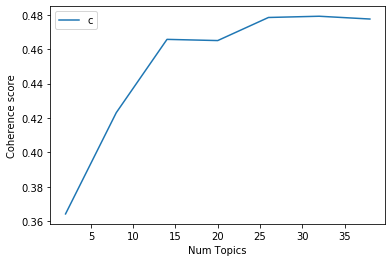

In [68]:
import matplotlib.pyplot as plt
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [69]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3642
Num Topics = 8  has Coherence Value of 0.4231
Num Topics = 14  has Coherence Value of 0.4657
Num Topics = 20  has Coherence Value of 0.465
Num Topics = 26  has Coherence Value of 0.4784
Num Topics = 32  has Coherence Value of 0.4792
Num Topics = 38  has Coherence Value of 0.4775


In [70]:
# Select the model and print the topics
optimal_model = model_list[5]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))


[(24,
  '0.323*"version" + 0.062*"upgrade" + 0.042*"previous" + 0.030*"user" + '
  '0.028*"improvement" + 0.027*"late" + 0.022*"release" + 0.020*"feature" + '
  '0.016*"difference" + 0.015*"make"'),
 (7,
  '0.034*"buy" + 0.033*"bad" + 0.031*"review" + 0.027*"people" + '
  '0.026*"company" + 0.025*"customer" + 0.023*"make" + 0.021*"give" + '
  '0.020*"pay" + 0.019*"star"'),
 (6,
  '0.102*"office" + 0.056*"word" + 0.050*"document" + 0.023*"format" + '
  '0.018*"page" + 0.018*"pdf" + 0.017*"work" + 0.017*"outlook" + '
  '0.015*"create" + 0.014*"open"'),
 (17,
  '0.052*"support" + 0.033*"call" + 0.026*"number" + 0.023*"time" + '
  '0.022*"check" + 0.019*"purchase" + 0.018*"problem" + 0.017*"issue" + '
  '0.017*"receive" + 0.016*"email"'),
 (21,
  '0.107*"feature" + 0.091*"user" + 0.043*"easy" + 0.041*"interface" + '
  '0.034*"provide" + 0.026*"application" + 0.023*"basic" + 0.022*"pro" + '
  '0.021*"offer" + 0.020*"simple"'),
 (18,
  '0.112*"year" + 0.055*"tax" + 0.049*"turbotax" + 0.047*"

In [51]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [52]:
data[0]

'Great product and price!'

In [53]:
corpus[0]

[(0, 1), (1, 1), (2, 1)]

In [54]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']


In [55]:
# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,27.0,0.0458,"good, great, easy, nice, price, excellent, exp...",Great product and price!
1,1,27.0,0.0479,"good, great, easy, nice, price, excellent, exp...",Great product and price!
2,2,27.0,0.0521,"good, great, easy, nice, price, excellent, exp...",Great product and price!
3,3,27.0,0.0521,"good, great, easy, nice, price, excellent, exp...",Great product and price!
4,4,27.0,0.0563,"good, great, easy, nice, price, excellent, exp...",Great product and price!
5,5,22.0,0.0408,"software, business, easy, package, small, comp...",Waaay too small. Will use for futur children!
6,6,33.0,0.0374,"shoe, comfortable, size, love, fit, wear, perf...",Stays vibrant after many washes
7,7,33.0,0.0437,"shoe, comfortable, size, love, fit, wear, perf...",Stays vibrant after many washes
8,8,33.0,0.0595,"shoe, comfortable, size, love, fit, wear, perf...",My son really likes the pink. Ones which I was...
9,9,19.0,0.0388,"window, run, upgrade, desktop, system, user, b...",Waaay too small. Will use for future child.


In [56]:
df_dominant_topic.Keywords[300]

'shoe, comfortable, size, love, fit, wear, perfect, foot, day, light'

In [57]:
df_dominant_topic.Text[300]

'Love these sneakers. Light weight and comfortable even without socks.'

In [58]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()


,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.4281,"program, find, easy, map, work, point, plan, l...",There are a couple of choices when you are loo...
1,1.0,0.3584,"love, hair, feel, shampoo, great, make, leave,...","Rock The Runway: Beautiful Red Color, does not..."
2,2.0,0.5662,"make, find, item, give, family, online, inform...",It has been said that the biggest cause of str...
3,3.0,0.4209,"security, computer, internet, virus, system, p...",Personal computers are under constant attack a...
4,4.0,0.4210,"problem, support, software, issue, call, fix, ...",<Warning: You must be careful of [stealth mark...


In [59]:
print(sent_topics_sorteddf_mallet.Text[5])
print("\n")
print(sent_topics_sorteddf_mallet.Keywords[5])

Bottom-line: Within its 130 or so glossy pages I have found a home, a resting place from which I can gleam my needed automotive knowledge.

Like most men in their twenties I was a car guy.  I ate and drank the elixir of horsepower, torque, RPM's, and colored sheet metal.  I could recite long lists of carlines and their varying specifications.  I subscribed to and devoured all of the (four) the nation's most popular car magazines of the time: "Car & Driver," Motor Trend, Road & Track, and the beauty queen of them all, Automobile Magazine.  But as time and overseas assignments took my attention elsewhere, one-by-one my subscriptions lapsed and my car fetish all but died.

But, now in the autumn of my life, I have rekindled my love of cars, especially expensive high performance mid-sized cars from well-known and well respected nameplates we all know: Cadillac, BMW, Audi, Lexus, Lincoln, Jaguar, and of course Mercedes-Benz.  So when I got a $5.00 off coupon from Magazines.com via e-mail, I

In [60]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics.head()


,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0,27.0,"good, great, easy, nice, price, excellent, exp...",1477.0,0.0512
1,27.0,"good, great, easy, nice, price, excellent, exp...",2205.0,0.0764
2,27.0,"good, great, easy, nice, price, excellent, exp...",479.0,0.0166
3,27.0,"good, great, easy, nice, price, excellent, exp...",1442.0,0.0499
4,27.0,"good, great, easy, nice, price, excellent, exp...",437.0,0.0151


In [61]:
lda_model.show_topics()

[(16,
  '0.000*"untrusted" + 0.000*"iffy" + 0.000*"booger" + 0.000*"thank_god" + 0.000*"dwindle" + 0.000*"doctrine" + 0.000*"bot" + 0.000*"attacker" + 0.000*"enquiring" + 0.000*"prowel"'),
 (4,
  '0.000*"untrusted" + 0.000*"iffy" + 0.000*"booger" + 0.000*"thank_god" + 0.000*"dwindle" + 0.000*"doctrine" + 0.000*"bot" + 0.000*"attacker" + 0.000*"enquiring" + 0.000*"prowel"'),
 (8,
  '0.313*"bad" + 0.000*"gift" + 0.000*"software" + 0.000*"card" + 0.000*"program" + 0.000*"version" + 0.000*"see" + 0.000*"window" + 0.000*"customer" + 0.000*"computer"'),
 (0,
  '0.224*"definitely" + 0.067*"true" + 0.029*"red" + 0.000*"gift" + 0.000*"card" + 0.000*"software" + 0.000*"easy" + 0.000*"program" + 0.000*"version" + 0.000*"take"'),
 (19,
  '0.254*"excellent" + 0.174*"require" + 0.147*"value" + 0.000*"gift" + 0.000*"card" + 0.000*"software" + 0.000*"program" + 0.000*"version" + 0.000*"easy" + 0.000*"user"'),
 (18,
  '0.430*"get" + 0.144*"even" + 0.097*"old" + 0.054*"high" + 0.040*"quality" + 0.039*"e

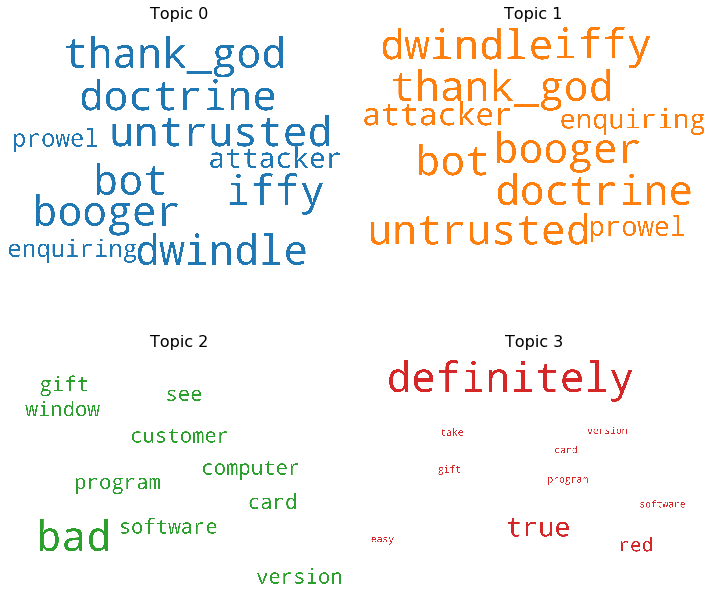

In [124]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()
